In [86]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

import warnings
warnings.filterwarnings('ignore')

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from collections import Counter

from sklearn.model_selection import train_test_split

import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score

from scipy.cluster.hierarchy import linkage, dendrogram

import pickle

from torch.autograd import Variable
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader

import torch.utils.data as data_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

In [87]:
%pip install ucimlrepo

In [88]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
regensburg_pediatric_appendicitis = fetch_ucirepo(id=938)

In [89]:
# data (as pandas dataframes)
rx = regensburg_pediatric_appendicitis.data.features
ry = regensburg_pediatric_appendicitis.data.targets

In [90]:
df = pd.merge(
    rx,
    ry,
    how='inner',
    left_index=True, right_index=True
)
df.head(5)
target = 'Diagnosis'

In [91]:
df = df.drop(['Severity', 'Management'], axis=1)

In [92]:
for column in df.select_dtypes(include=['number']).columns:
  df[column].fillna(df[column].mean(), inplace=True)
for column in df.select_dtypes(include=['object']).columns:
  df[column].fillna('no', inplace=True)

In [93]:
df = df.drop(df[df['Diagnosis'] == 'no'].index)

In [94]:
labels = df[target].unique()
labels

array(['appendicitis', 'no appendicitis'], dtype=object)

In [95]:
df = df.drop(df[df[target]=='no appendicitis'].iloc[::2].index)
df = df.drop(df[df[target]=='no appendicitis'].iloc[::3].index)

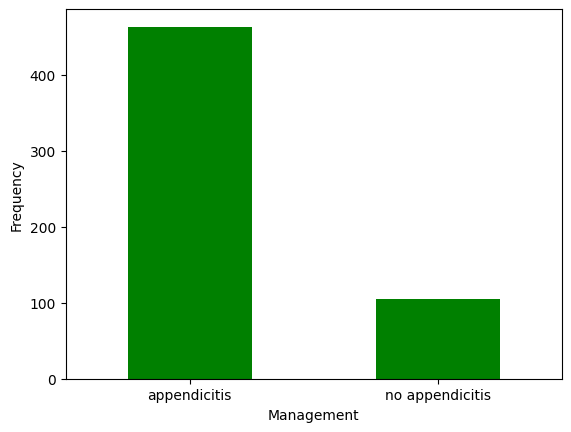

In [96]:
count_classes = pd.value_counts(df[target], sort = True)
count_classes.plot(kind = 'bar', rot=0, color="g")
plt.xticks(range(2), labels)
plt.xlabel("Management")
plt.ylabel("Frequency");

Наш набор данных несбалансирован.

In [97]:
x = df.copy()

In [98]:
cat_columns = x.select_dtypes(['object']).columns
x[cat_columns] = x[cat_columns].apply ( lambda x: pd.factorize (x)[ 0 ])
x=(x-x.min())/(x.max()-x.min())
x.head(5)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,Appendix_Diameter,...,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings,Diagnosis
0,0.690632,0.299044,0.0,0.693431,0.333603,0.074074,0.4,0.3,0.0,0.307692,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.603486,0.299044,0.0,0.802920,0.414378,0.074074,0.5,0.6,0.0,0.300699,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.601852,0.754039,0.5,0.496350,0.414378,0.074074,0.6,0.7,1.0,0.354032,...,1.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7,0.384532,0.365216,0.0,0.693558,0.177100,0.037037,0.3,0.3,1.0,0.354032,...,0.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,0.781046,0.233103,0.5,0.883212,0.419426,0.074074,0.4,0.4,0.0,0.370629,...,1.0,0.04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
df_train, df_test = model_selection.train_test_split(x, test_size=0.2, random_state=47)

In [100]:
X_train = df_train.drop(target,axis=1)
y_train = df_train[target]

X_test = df_test.drop(target,axis=1)
y_test = df_test[target]

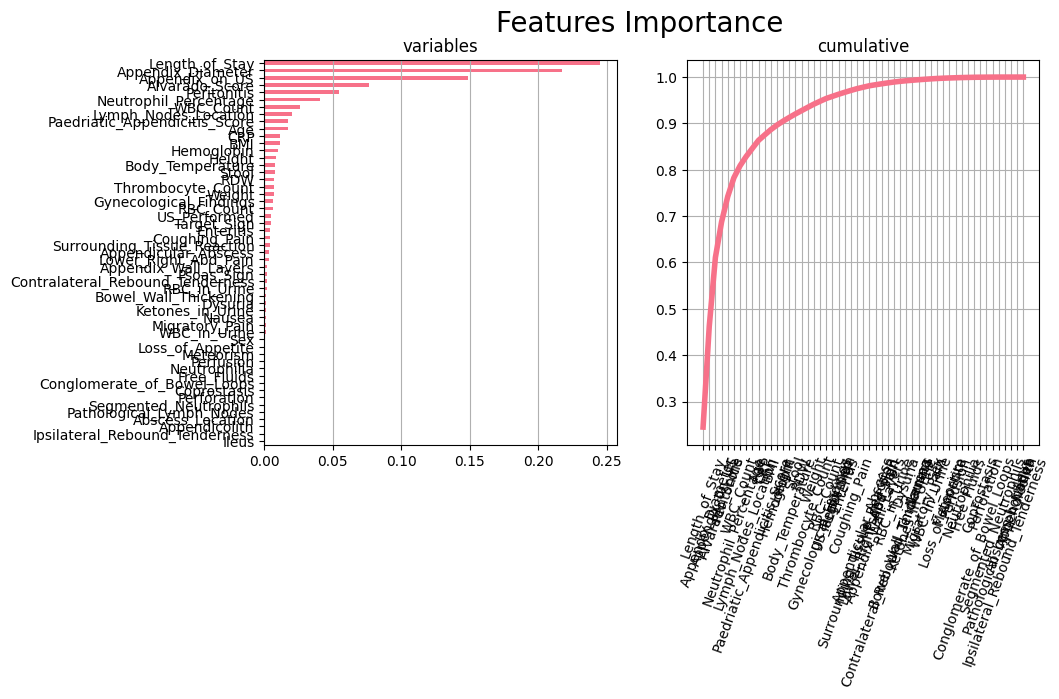

In [101]:
X = X_train.values
y = y_train.values
feature_names = X_train.columns.tolist()

model = ensemble.RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X,y)
importances = model.feature_importances_

dtf_importances = pd.DataFrame({"IMPORTANCE":importances,
                                "VARIABLE":feature_names}).sort_values("IMPORTANCE",
                                                                       ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False,figsize=(10,5),dpi=100)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
    kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4,
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)),
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')

plt.show()

In [102]:
df = df[['Appendix_Diameter', 'Length_of_Stay', 'Appendix_on_US', 'Paedriatic_Appendicitis_Score', 'Neutrophil_Percentage', target]]

In [103]:
x = df.copy()
cat_columns = x.select_dtypes(['object']).columns
x[cat_columns] = x[cat_columns].apply ( lambda x: pd.factorize (x)[ 0 ])
x=(x-x.min())/(x.max()-x.min())
x.head(5)

,Appendix_Diameter,Length_of_Stay,Appendix_on_US,Paedriatic_Appendicitis_Score,Neutrophil_Percentage,Diagnosis
0,0.307692,0.074074,0.0,0.3,0.581560,0.0
4,0.300699,0.074074,0.0,0.6,0.238298,0.0
5,0.354032,0.074074,1.0,0.7,0.626950,1.0
7,0.354032,0.037037,1.0,0.3,0.743262,1.0
9,0.370629,0.074074,0.0,0.4,0.283688,0.0


In [104]:
primaryDF = df[df[target] == 'appendicitis']
secondaryDF = df[df[target] == 'no appendicitis']

In [105]:
primaryDF.shape

(463, 6)

In [106]:
secondaryDF.shape

(105, 6)

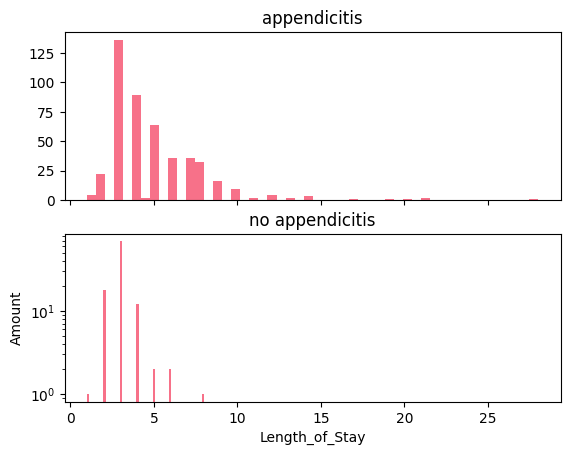

In [107]:
f, (ax2, ax3) = plt.subplots(2, 1, sharex=True)

bins = 50

feature = 'Length_of_Stay'

ax2.hist(primaryDF[feature], bins = bins)
ax2.set_title('appendicitis')

ax3.hist(secondaryDF[feature], bins = bins)
ax3.set_title('no appendicitis')

plt.xlabel(feature)
plt.ylabel('Amount')
plt.yscale('log')
plt.show();

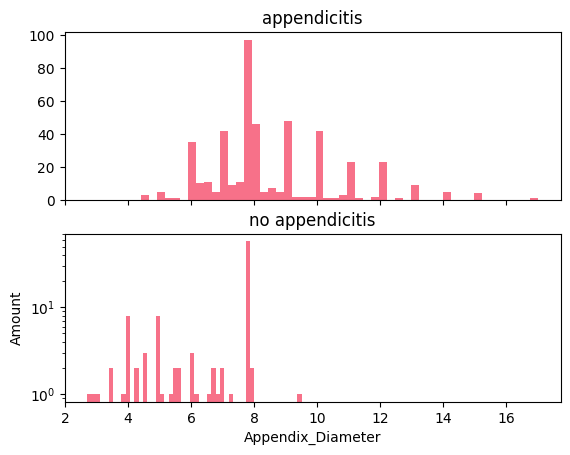

In [108]:
f, (ax2, ax3) = plt.subplots(2, 1, sharex=True)

bins = 50

feature = 'Appendix_Diameter'

ax2.hist(primaryDF[feature], bins = bins)
ax2.set_title('appendicitis')

ax3.hist(secondaryDF[feature], bins = bins)
ax3.set_title('no appendicitis')

plt.xlabel(feature)
plt.ylabel('Amount')
plt.yscale('log')
plt.show();

In [109]:
x = x.dropna()
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 568 entries, 0 to 781
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Appendix_Diameter              568 non-null    float64
 1   Length_of_Stay                 568 non-null    float64
 2   Appendix_on_US                 568 non-null    float64
 3   Paedriatic_Appendicitis_Score  568 non-null    float64
 4   Neutrophil_Percentage          568 non-null    float64
 5   Diagnosis                      568 non-null    float64
dtypes: float64(6)
memory usage: 31.1 KB


### Разделите набор данных на наборы обучающих и тестовых данных.


In [110]:
X_train, X_test = train_test_split(x, test_size=0.2, random_state=47)
X_train = X_train[X_train[target] == 0]
X_train = X_train.drop([target], axis=1)

y_test = X_test[target]
X_test = X_test.drop([target], axis=1)

X_train = X_train.values
X_test = X_test.values
y_test = y_test.values

print(X_train.size)
print(y_test.size)

1855
114


## Model

In [111]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(5, 4),
            nn.LeakyReLU(),
            nn.Linear(4, 3),
            nn.LeakyReLU(),
        )

        self.decoder = nn.Sequential(
           nn.Linear(3, 4),
           nn.LeakyReLU(),
           nn.Linear(4, 5),
           nn.LeakyReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [112]:
model = Autoencoder().double()

num_epochs = 100
minibatch_size = 64

train_loader = data_utils.DataLoader(X_train, batch_size=minibatch_size, shuffle=True)
test_loader = data_utils.DataLoader(X_test, batch_size=1, shuffle=False)
criterion = nn.MSELoss()
optimizer = torch.optim.Adadelta(model.parameters())
history = {}
history['train_loss'] = []
history['test_loss'] = []

In [113]:
for epoch in range(num_epochs):
    h = np.array([])
    for data in train_loader:
        # ===================forward=====================
        output = model(data)
        loss = criterion(output, data)
        h = np.append(h, loss.item())
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    mean_loss = np.mean(h)
    if((epoch+1)%5==0):
        print('epoch [{}/{}], loss:{:.4f}'.format(epoch + 1, num_epochs, mean_loss))
    history['train_loss'].append(mean_loss)

torch.save(model.state_dict(), './credit_card_model.pth')

epoch [5/100], loss:0.0802
epoch [10/100], loss:0.0540
epoch [15/100], loss:0.0452
epoch [20/100], loss:0.0367
epoch [25/100], loss:0.0253
epoch [30/100], loss:0.0197
epoch [35/100], loss:0.0188
epoch [40/100], loss:0.0186
epoch [45/100], loss:0.0185
epoch [50/100], loss:0.0186
epoch [55/100], loss:0.0185
epoch [60/100], loss:0.0184
epoch [65/100], loss:0.0185
epoch [70/100], loss:0.0183
epoch [75/100], loss:0.0182
epoch [80/100], loss:0.0181
epoch [85/100], loss:0.0178
epoch [90/100], loss:0.0179
epoch [95/100], loss:0.0177
epoch [100/100], loss:0.0175


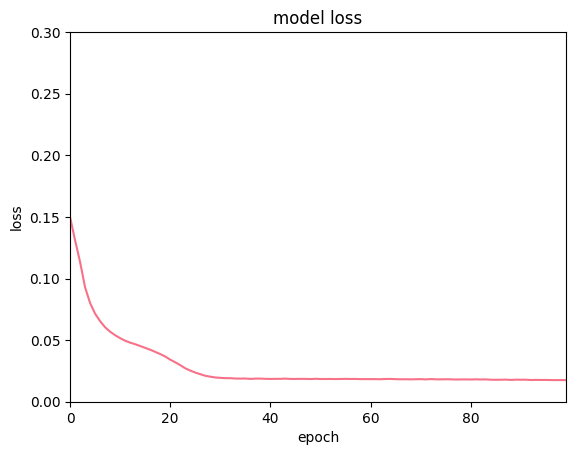

In [114]:
plt.plot(history['train_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.axis([0, epoch, 0, 0.3])
plt.show()

## Оценка модели

In [115]:
pred_losses = {'pred_loss' : []}
model.eval()
with torch.no_grad():
    for data in test_loader:
        inputs = data
        outputs = model(inputs)
        loss = criterion(outputs, inputs).data.item()
        pred_losses['pred_loss'].append(loss)

reconstructionErrorDF = pd.DataFrame(pred_losses)
reconstructionErrorDF['Class'] = y_test

In [116]:
reconstructionErrorDF.describe()

,pred_loss,Class
count,114.000000,114.000000
mean,0.018906,0.192982
std,0.016162,0.396382
min,0.000914,0.000000
25%,0.006297,0.000000
50%,0.012348,0.000000
75%,0.026783,0.000000
max,0.073160,1.000000


In [117]:
reconstructionErrorDF.describe()

,pred_loss,Class
count,114.000000,114.000000
mean,0.018906,0.192982
std,0.016162,0.396382
min,0.000914,0.000000
25%,0.006297,0.000000
50%,0.012348,0.000000
75%,0.026783,0.000000
max,0.073160,1.000000


# Reconstruction Errors primary surgical

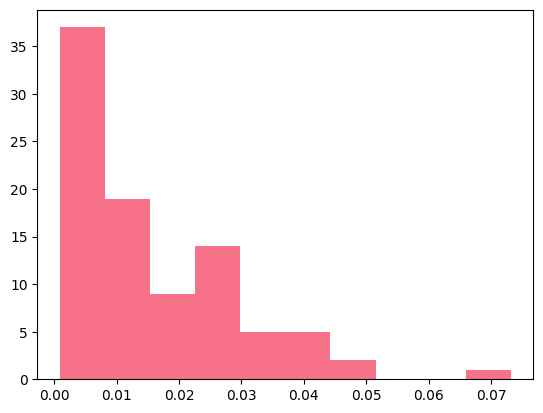

In [118]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_error_df = reconstructionErrorDF[(reconstructionErrorDF['Class']== 0) & (reconstructionErrorDF['pred_loss'] < 10)]
_ = ax.hist(normal_error_df.pred_loss.values, bins=10)

# Reconstruction Errors secondary surgical

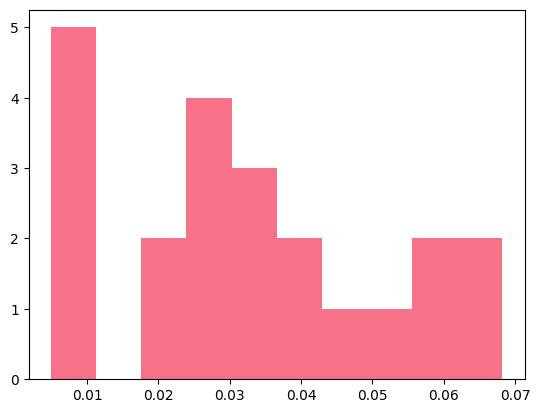

In [119]:
fig = plt.figure()
ax = fig.add_subplot(111)
fraud_error_df = reconstructionErrorDF[(reconstructionErrorDF['Class']== 1) ]
_ = ax.hist(fraud_error_df.pred_loss.values, bins=10)

## ROC Curves

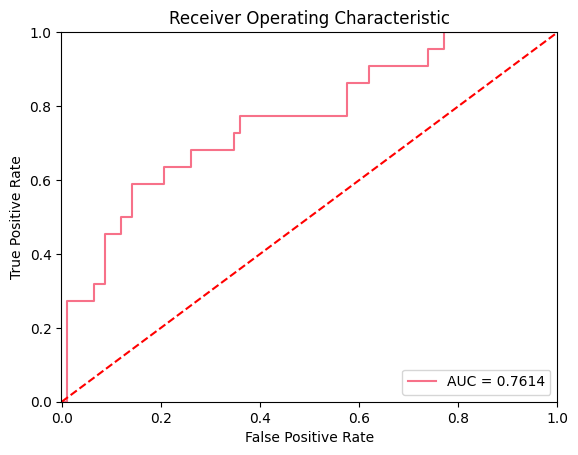

In [120]:
fpr, tpr, thresholds = roc_curve(reconstructionErrorDF.Class, reconstructionErrorDF.pred_loss)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show();

## Precision vs Recall

Установка порога, который используется для принятия решения о классификации в модели, — это способ настроить компромисс между точностью (precision) и полнотой (recall) для данного классификатора.

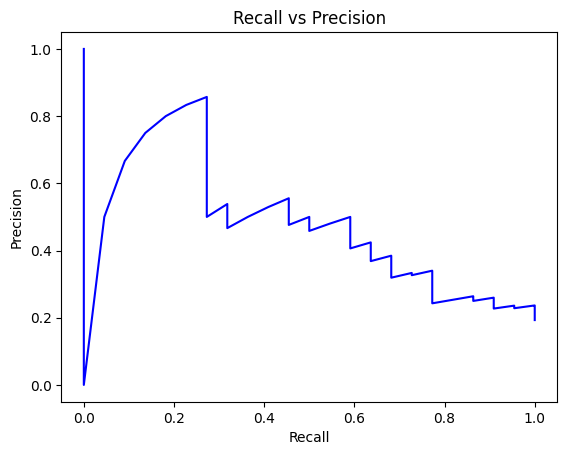

In [121]:
precision, recall, th = precision_recall_curve(reconstructionErrorDF.Class, reconstructionErrorDF.pred_loss)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

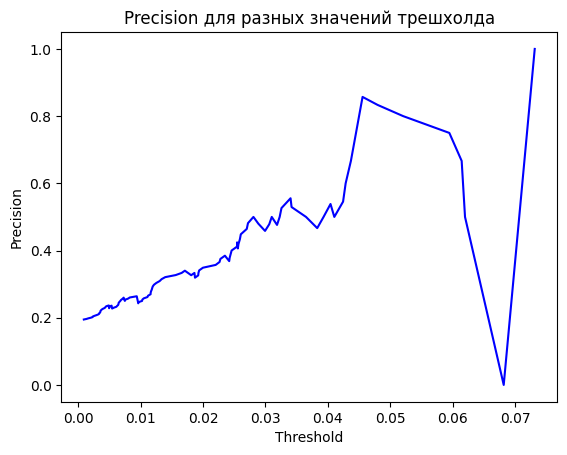

In [122]:
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision для разных значений трешхолда')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

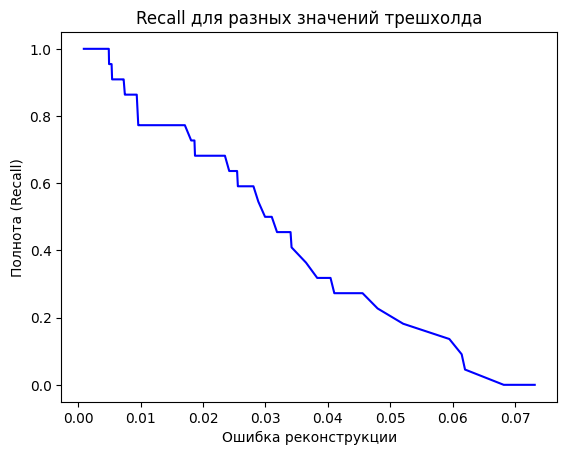

In [123]:
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall для разных значений трешхолда')
plt.xlabel('Ошибка реконструкции')
plt.ylabel('Полнота (Recall)')
plt.show()

In [124]:
threshold = 0.016

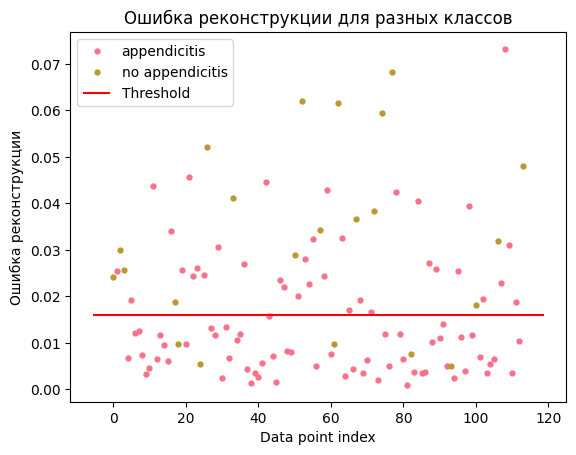

In [125]:
groups = reconstructionErrorDF.groupby('Class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.pred_loss, marker='o', ms=3.5, linestyle='',
            label= "no appendicitis" if name == 1 else "appendicitis")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Ошибка реконструкции для разных классов")
plt.ylabel("Ошибка реконструкции")
plt.xlabel("Data point index")
plt.show();

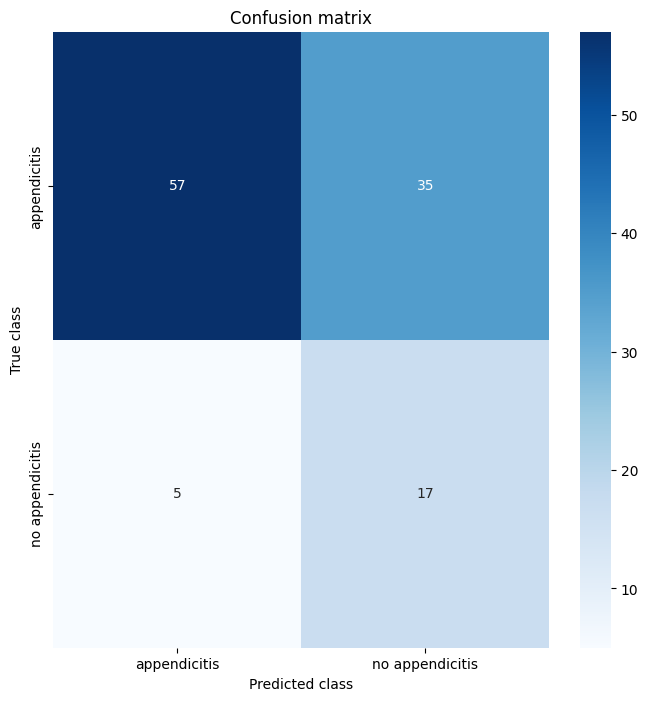

In [126]:
y_pred = [1 if e > threshold else 0 for e in reconstructionErrorDF.pred_loss.values]
conf_matrix = confusion_matrix(reconstructionErrorDF.Class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d",
            cmap=plt.cm.get_cmap('Blues'));
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()